<a href="https://colab.research.google.com/github/BridgetHolt/DS4002/blob/main/6_Wordcloud_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## This script performs a word cloud analysis of common keywords.

In [2]:
# Connect to GitHub
! git clone https://github.com/BridgetHolt/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 460, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 460 (delta 88), reused 21 (delta 21), pack-reused 314 (from 2)
Receiving objects: 100% (460/460), 17.95 MiB | 17.10 MiB/s, done.
Resolving deltas: 100% (198/198), done.


In [3]:
# Load necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
# Reading file
df=pd.read_csv('DS4002/DATA/combined_clean_data.csv')

In [5]:
# Install wordcloud matplotlib in order to visualize wordclouds
!pip install wordcloud matplotlib

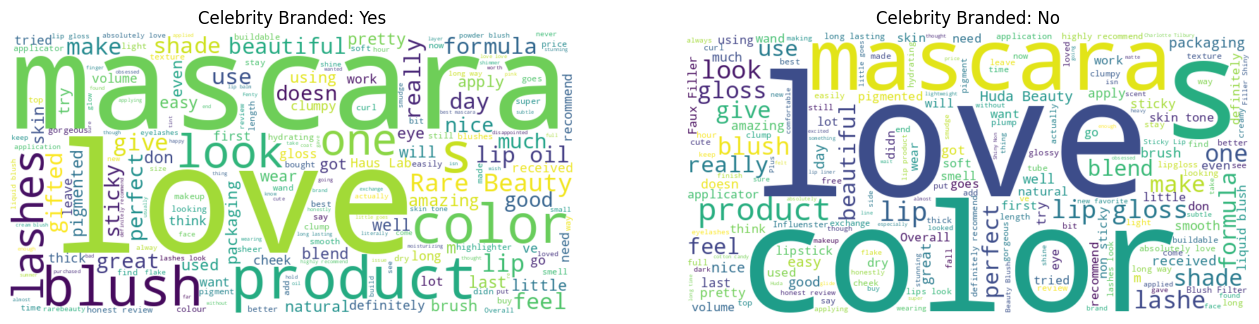

In [6]:
# Filter DataFrame for CelebrityBranded values
df_yes = df[df['CelebrityBranded'].str.lower() == 'yes']
df_no = df[df['CelebrityBranded'].str.lower() == 'no']

# Combine all review texts into one string for each group
text_yes = " ".join(review for review in df_yes['ReviewText'].dropna())
text_no = " ".join(review for review in df_no['ReviewText'].dropna())

from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["and", "the", "t"])

# enerate the word clouds with the stopwords removed
wordcloud_yes = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_yes)
wordcloud_no = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_no)

# Plot the word clouds side by side
plt.figure(figsize=(16, 8))

# CelebrityBranded == "yes"
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_yes, interpolation='bilinear')
plt.axis('off')
plt.title("Celebrity Branded: Yes")

# CelebrityBranded == "no"
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_no, interpolation='bilinear')
plt.axis('off')
plt.title("Celebrity Branded: No")

plt.show()

In [7]:
# Import necessary package for statistical tests
from scipy.stats import ttest_ind

# Split the DataFrame into celebrity and non-celebrity groups
df_yes = df[df['CelebrityBranded'].str.lower() == 'yes']
df_no  = df[df['CelebrityBranded'].str.lower() == 'no']

# List of numeric columns to analyze
numeric_cols = ['PositiveScore', 'NegativeScore', 'CompoundScore', 'NeutralScore']

# Loop over each column and calculate the mean, standard deviation, and perform a t-test
for col in numeric_cols:
    # Calculate means and standard deviations
    mean_yes = df_yes[col].mean()
    std_yes  = df_yes[col].std()
    mean_no  = df_no[col].mean()
    std_no   = df_no[col].std()

    # Perform an independent t-test (using Welch's t-test by setting equal_var=False)
    t_stat, p_val = ttest_ind(df_yes[col].dropna(), df_no[col].dropna(), equal_var=False)

    # Print out the results
    print(f"Results for {col}:")
    print(f"  Celebrity Branded - Mean: {mean_yes:.3f}, Std: {std_yes:.3f}")
    print(f"  Non-Celebrity    - Mean: {mean_no:.3f}, Std: {std_no:.3f}")
    print(f"  t-statistic: {t_stat:.3f}, p-value: {p_val:.3e}\n")

Results for PositiveScore:
  Celebrity Branded - Mean: 0.242, Std: 0.124
  Non-Celebrity    - Mean: 0.244, Std: 0.110
  t-statistic: -1.457, p-value: 1.450e-01

Results for NegativeScore:
  Celebrity Branded - Mean: 0.035, Std: 0.058
  Non-Celebrity    - Mean: 0.027, Std: 0.047
  t-statistic: 12.451, p-value: 1.779e-35

Results for CompoundScore:
  Celebrity Branded - Mean: 0.703, Std: 0.412
  Non-Celebrity    - Mean: 0.784, Std: 0.357
  t-statistic: -17.445, p-value: 9.670e-68

Results for NeutralScore:
  Celebrity Branded - Mean: 0.723, Std: 0.115
  Non-Celebrity    - Mean: 0.729, Std: 0.101
  t-statistic: -4.488, p-value: 7.232e-06



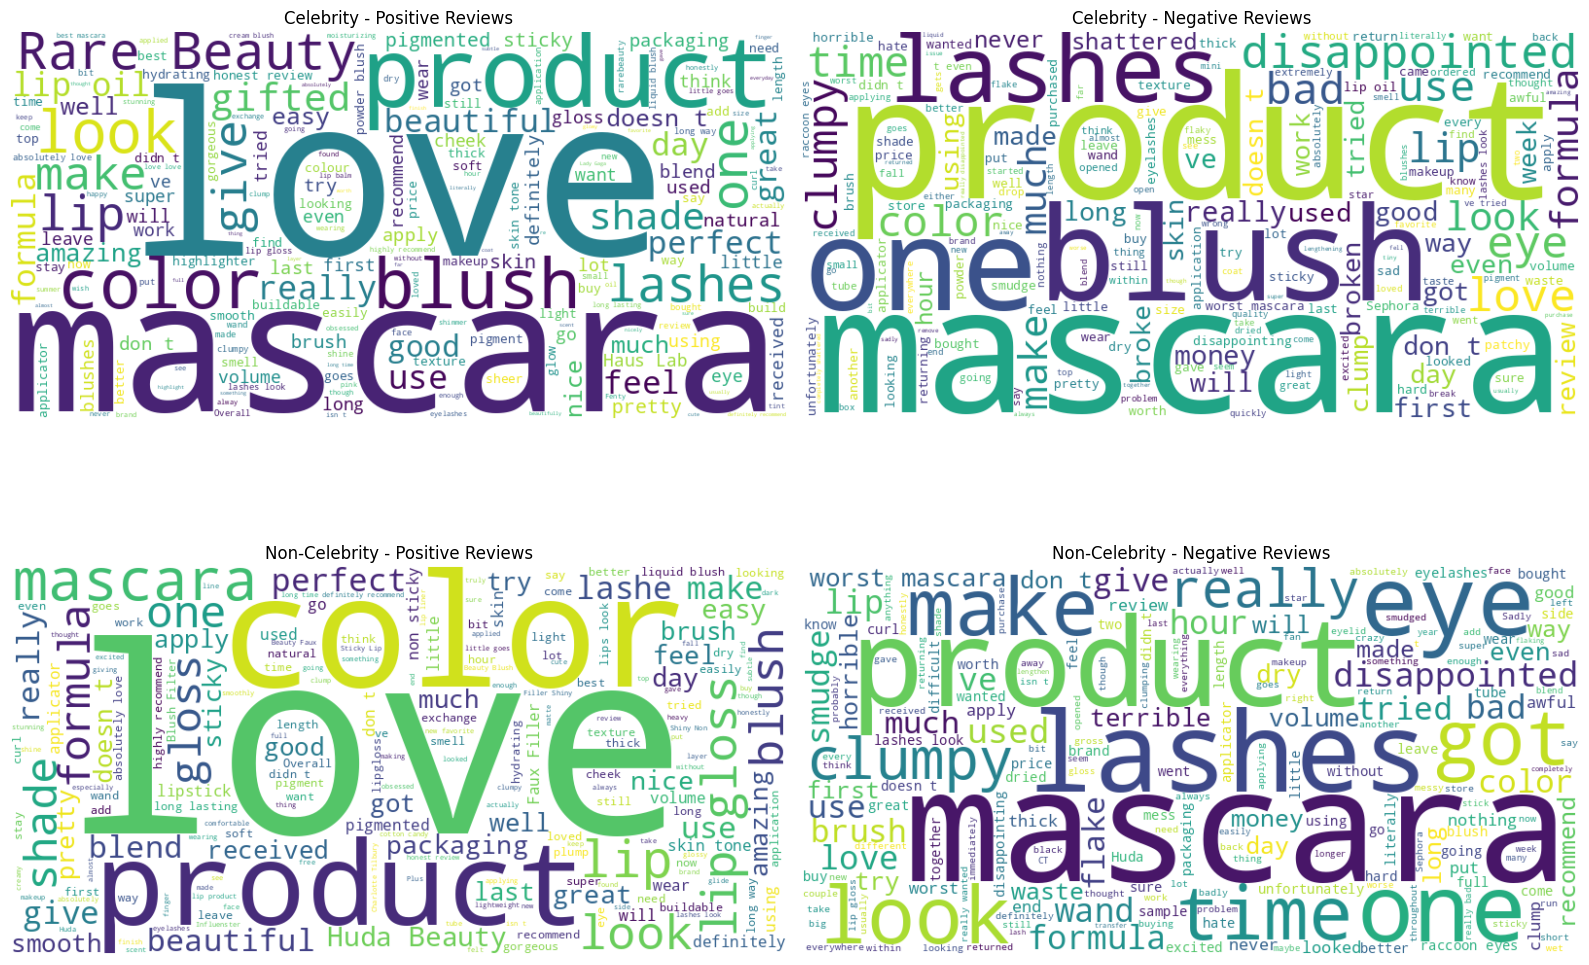

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Ensure consistent lowercase comparisons and drop any potential NaNs in 'Sentiment'
df['CelebrityBranded'] = df['CelebrityBranded'].str.lower()
df['Sentiment'] = df['Sentiment'].str.lower()

# Filter data for each group:
df_celebrity_pos = df[(df['CelebrityBranded'] == 'yes') & (df['Sentiment'] == 'positive')]
df_celebrity_neg = df[(df['CelebrityBranded'] == 'yes') & (df['Sentiment'] == 'negative')]
df_noncelebrity_pos = df[(df['CelebrityBranded'] == 'no') & (df['Sentiment'] == 'positive')]
df_noncelebrity_neg = df[(df['CelebrityBranded'] == 'no') & (df['Sentiment'] == 'negative')]

# Combine all review texts into one string for each group
text_celebrity_pos = " ".join(review for review in df_celebrity_pos['ReviewText'].dropna())
text_celebrity_neg = " ".join(review for review in df_celebrity_neg['ReviewText'].dropna())
text_noncelebrity_pos = " ".join(review for review in df_noncelebrity_pos['ReviewText'].dropna())
text_noncelebrity_neg = " ".join(review for review in df_noncelebrity_neg['ReviewText'].dropna())

# Setup stopwords (include additional ones if desired)
stopwords = set(STOPWORDS)
stopwords.update(["and", "the", "s", "m"])  # Blocking words like "s" and "m"

# Generate the word clouds for each group
wordcloud_celebrity_pos = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_celebrity_pos)
wordcloud_celebrity_neg = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_celebrity_neg)
wordcloud_noncelebrity_pos = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_noncelebrity_pos)
wordcloud_noncelebrity_neg = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_noncelebrity_neg)

# Plot the four word clouds in a 2x2 grid
plt.figure(figsize=(16, 12))

# Celebrity Positive Reviews
plt.subplot(2, 2, 1)
plt.imshow(wordcloud_celebrity_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Celebrity - Positive Reviews")

# Celebrity Negative Reviews
plt.subplot(2, 2, 2)
plt.imshow(wordcloud_celebrity_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Celebrity - Negative Reviews")

# Non-Celebrity Positive Reviews
plt.subplot(2, 2, 3)
plt.imshow(wordcloud_noncelebrity_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Non-Celebrity - Positive Reviews")

# Non-Celebrity Negative Reviews
plt.subplot(2, 2, 4)
plt.imshow(wordcloud_noncelebrity_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Non-Celebrity - Negative Reviews")

plt.tight_layout()
plt.show()